data complete


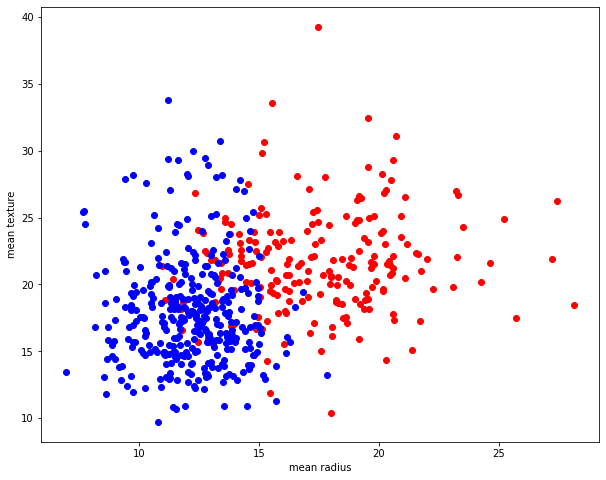

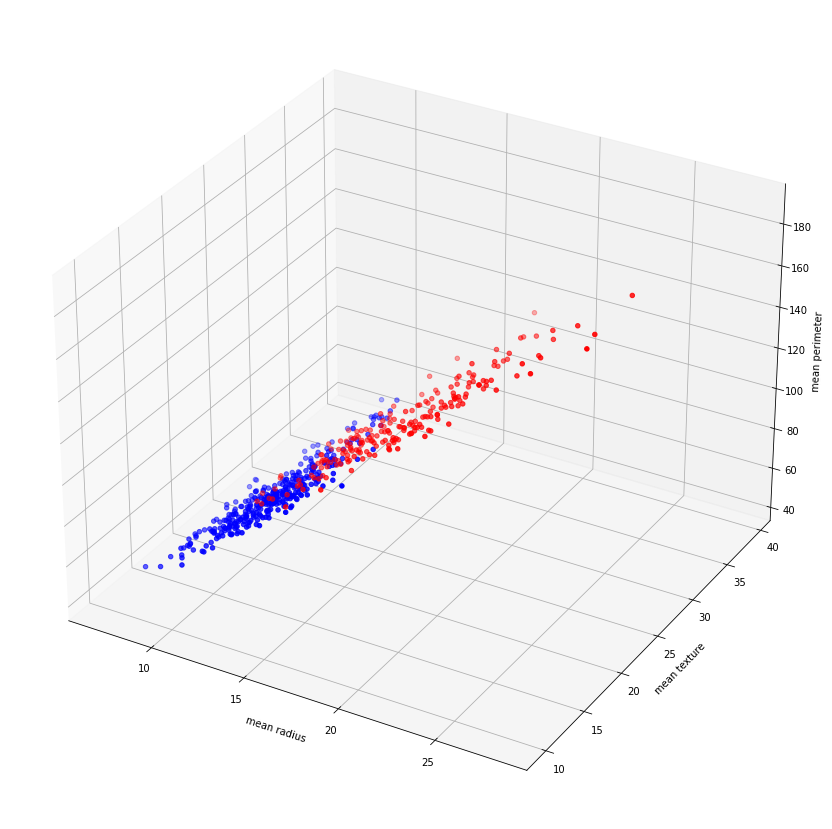

[0.10726818]
[[ 0.60830807  0.52872666  0.51006433 -0.03153922 -0.01700491 -0.0951865
  -0.13488198 -0.05348446 -0.03126493 -0.00455624  0.028375    0.14934177
   0.03164109 -0.10808125 -0.0015008  -0.02236606 -0.03068886 -0.00715694
  -0.00586079 -0.002143    0.70474253 -0.57311551 -0.32263243 -0.00540735
  -0.03430165 -0.32139938 -0.40476617 -0.10930088 -0.0927484  -0.03010916]]


/Users/ryan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn import linear_model

dataset = load_breast_cancer()
cancer = pd.DataFrame(dataset.data, columns = dataset.feature_names)
complete = True
missing = cancer.isnull().sum()
for x in range(len(missing)):
    if missing[x] != 0:
        complete = False
        break;
        
if complete != True:
    print("missing data")
    exit()
else:
    print("data complete")
    
#in this case, we are using only the mean radius, mean texture, and mean perimeter

X = []
for target in range(2): #loops thorugh twice, first time to get all the malignant cases, second to get the benign
    X.append([[],[],[]]) #makes a space to hold both data values for true and false values (4 total)
    for i in range(len(dataset.data)):
        if dataset.target[i] == target: #if it is cancerous/benign
            X[target][0].append(dataset.data[i][0]) #add first feature
            X[target][1].append(dataset.data[i][1]) #add second feature
            X[target][2].append(dataset.data[i][2])#add third feature
            
#plot in 2d scatter (just mean radius and texture)
colours = ("r", "b")
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
for target in range(2):
    ax.scatter(X[target][0], X[target][1], c = colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

#plot in 3d
fig2 = plt.figure(figsize = (18,15))
ax = fig2.add_subplot(111, projection = '3d')
for target in range(2):
    ax.scatter(X[target][0], X[target][1], X[target][2], c = colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

#training the model using all the features
train_set, test_set, train_labels, test_labels = train_test_split(dataset.data, dataset.target, test_size = 0.25, random_state = 1, stratify = dataset.target)
x = train_set[:,0:30]
y = train_labels
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x, y = y)

print(log_regress.intercept_)
print(log_regress.coef_)